# AI Agents Tutorial.

Author: [Zoumana Keita](https://www.youtube.com/@techwithzoum)

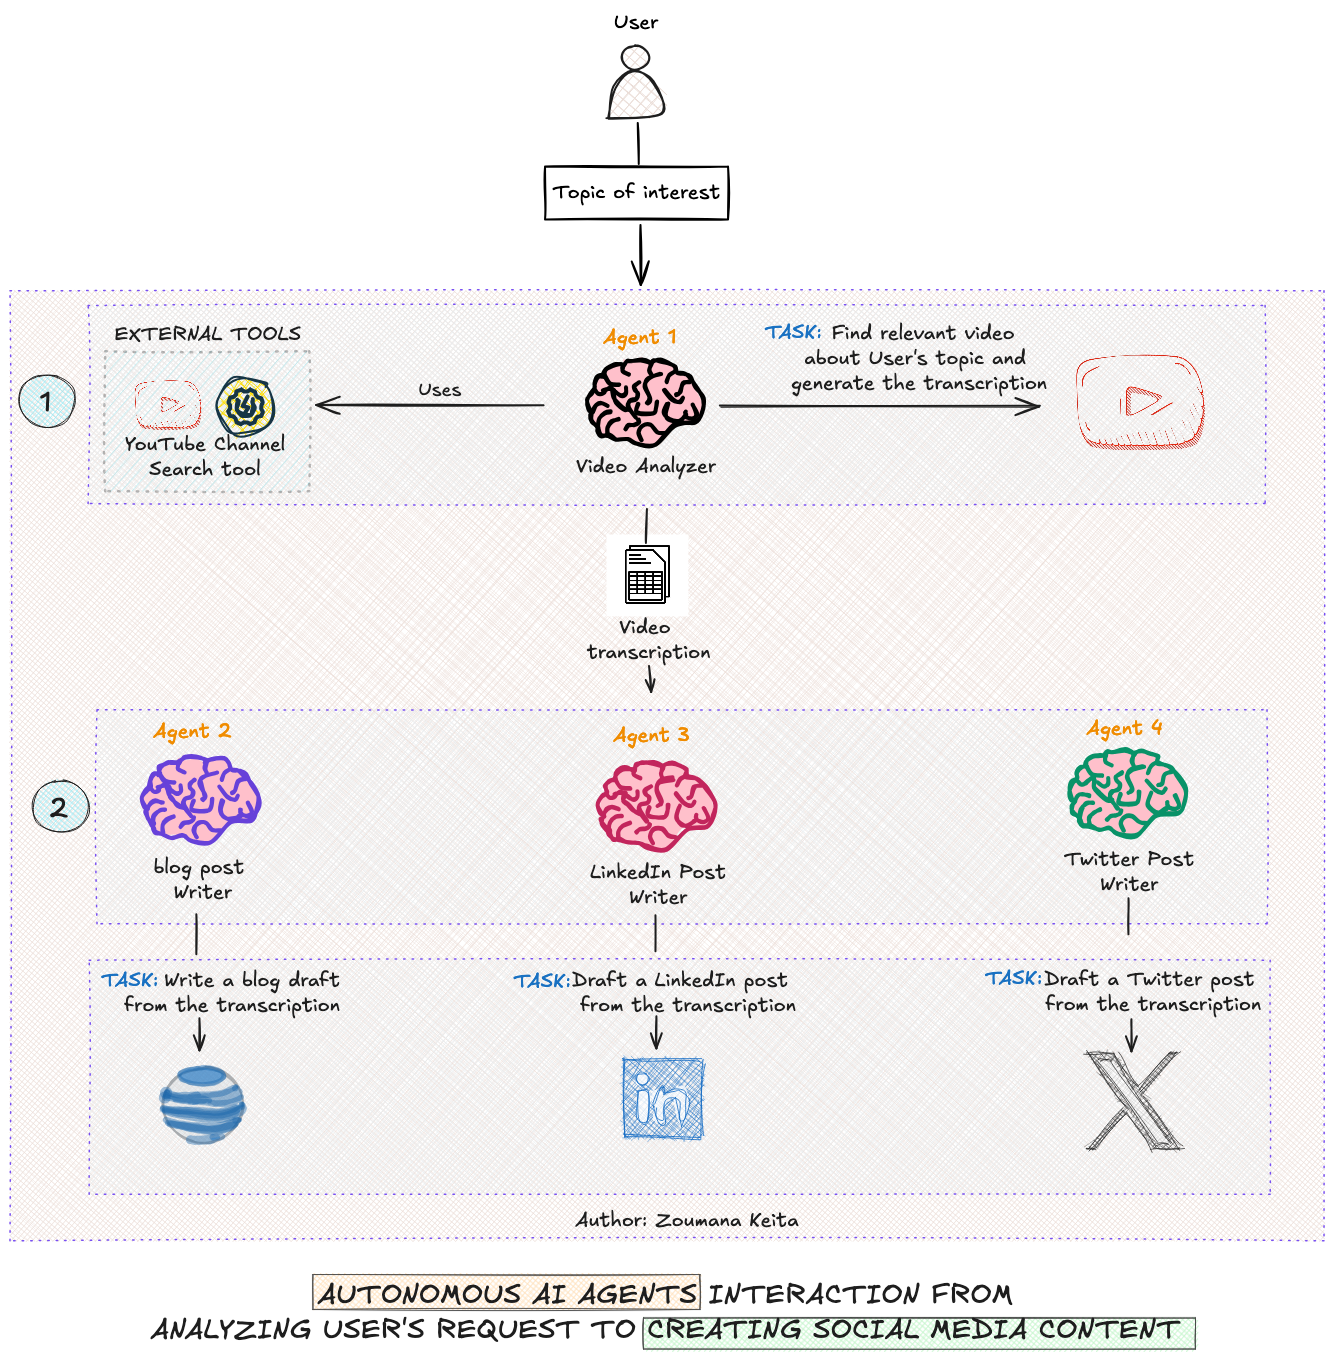

## 1. Install libraries

In [1]:
%%bash

pip -qqq install 'crewai[tools]'
pip -qqq install youtube-transcript-api
pip -qqq install yt_dlp

## 2. Import libraries

In [2]:
import os
from crewai import Agent
from google.colab import userdata
from crewai import Crew, Process
from crewai_tools import YoutubeChannelSearchTool
from crewai import Task

In [3]:
OPENAI_API_KEY = userdata.get('OPEN_AI_KEY')
model_ID = userdata.get('GPT_MODEL')
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [4]:
os.environ["OPENAI_MODEL_NAME"] = model_ID

# Agents and their tasks

In [5]:
# The tool used by the topic researcher
youtube_tool = YoutubeChannelSearchTool(youtube_channel_handle='@techwithzoum')

Processing videos:   0%|          | 0/62 [00:00<?, ?it/s]ERROR:root:Failed to fetch transcript for video https://www.youtube.com/watch?v=JwZciSgWCyM
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/youtube_transcript_api/_transcripts.py", line 34, in _raise_http_errors
    response.raise_for_status()
  File "/usr/local/lib/python3.10/dist-packages/requests/models.py", line 1024, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 429 Client Error: Too Many Requests for url: https://www.google.com/sorry/index?continue=https://www.youtube.com/watch%3Fv%3DJwZciSgWCyM&q=EgQifO2oGM3VnrUGIjAOHYPjmYCZBQPKSWfyjdnaVs0Mp7CHLk5j5FWDIlIN_AEvwApgKSVOWNFxE5GpzBwyAXJaAUM

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/embedchain/loaders/youtube_video.py", line 28, in load_data
    languages = [transcript.language_c

In [6]:
youtube_tool

YoutubeChannelSearchTool(name='Search a Youtube Channels content', description="Search a Youtube Channels content(search_query: 'string') - A tool that can be used to semantic search a query the @techwithzoum Youtube Channels content. search_query: 'Mandatory search query you want to use to search the Youtube Channels content'", args_schema=<class 'crewai_tools.tools.youtube_channel_search_tool.youtube_channel_search_tool.FixedYoutubeChannelSearchToolSchema'>, description_updated=False, cache_function=<function BaseTool.<lambda> at 0x7c4d3bf99990>, result_as_answer=False, summarize=False, adapter=EmbedchainAdapter(embedchain_app=<embedchain.app.App object at 0x7c4d3b55f790>, summarize=False), config=None)

## 1. Agents

In [8]:
# Topic Researcher Agent
topic_researcher = Agent(
    role='Topic Researcher',
    goal='Search for relevant videos on the topic {topic} from the provided YouTube channel',
    verbose=True,
    memory=True,
    backstory="Expert in finding and analyzing relevant content from YouTube channels, specializing in AI, Data Science, Machine Learning, and Generative AI topics.",
    tools=[youtube_tool],
    allow_delegation=True
)


# LinkedIn Post Agent
linkedin_post_agent = Agent(
    role='LinkedIn Post Creator',
    goal='Create a concise LinkedIn post summary from the transcription provided by the Topic Researcher.',
    verbose=True,
    memory=True,
    backstory="Expert in crafting engaging LinkedIn posts that summarize complex topics and include trending hashtags for maximum visibility.",
    allow_delegation=False
)


# Twitter Agent
twitter_agent = Agent(
    role='Twitter Content Creator',
    goal='Create a short tweet from the transcription provided by the Topic Researcher that capture key points and insights',
    verbose=True,
    memory=True,
    backstory="Specializes in distilling complex information into concise, impactful tweets that resonate with a tech-savvy audience.",
    allow_delegation=False
)

# Blog Writer Agent
blog_writer = Agent(
    role='Blog Writer',
    goal='Write a comprehensive blog post from the transcription provided by the Topic Researcher, covering all necessary sections',
    verbose=True,
    memory=True,
    backstory="Experienced in creating in-depth, well-structured blog posts that explain technical concepts clearly and engage readers from introduction to conclusion.",
    allow_delegation=False
)


## 2. Tasks

In [9]:
# Tasks
research_task = Task(
    description="Identify and analyze videos on the topic {topic} from the specified YouTube channel.",
    expected_output="A complete word by word report on the most relevant video found on the topic {topic}.",
    agent=topic_researcher,
    tools=[youtube_tool]
)


blog_writing_task = Task(
    description=""" Write a comprehensive blog post based on the transcription provided by the Topic Researcher.
                    The article must include an introduction , step-by-step guides, and conclusion.
                    The overall content must be about 1200 words long.""",
    expected_output="A markdown-formatted of the blog",
    agent=blog_writer,
    output_file='blog-post.md'
)

linkedin_post_task = Task(
    description="Create a LinkedIn post summarizing the key points from the transcription provided by the Topic Researcher, including relevant hashtags.",
    expected_output="A markdown-formatted of the LinkedIn post",
    agent=linkedin_post_agent,
    output_file='linkedin-post.md'
)


twitter_task = Task(
    description="Create a tweet from the transcription provided by the Topic Researcher, including relevant hastags.",
    expected_output="A markdown-formatted of the Twitter post",
    agent=twitter_agent,
    output_file='tweets.md'
)

## 3. Run the Crew

In [10]:
# Crew setup
my_crew = Crew(
    agents=[topic_researcher, linkedin_post_agent, twitter_agent, blog_writer],
    tasks=[research_task, linkedin_post_task, twitter_task, blog_writing_task],
    verbose=True,
    process=Process.sequential,
    memory=True,
    cache=True,
    max_rpm=100,
    share_crew=True
)

In [12]:
# Crew setup
my_crew = Crew(
    agents=[topic_researcher, linkedin_post_agent, twitter_agent, blog_writer],
    tasks=[research_task, linkedin_post_task, twitter_task, blog_writing_task],
    verbose=True,
    process=Process.sequential,
    memory=True,
    cache=True,
    max_rpm=100,
    share_crew=True
)

In [13]:
# Execute the crew's tasks
topic_of_interest = 'GPT3.5 Turbo Fine-tuning and Graphical Interface'
result = my_crew.kickoff(inputs={'topic': topic_of_interest})

print("-----------------------------")
print(result)

 [2024-07-29 14:47:53][DEBUG]: == Working Agent: Topic Researcher
 [2024-07-29 14:47:53][INFO]: == Starting Task: Identify and analyze videos on the topic GPT3.5 Turbo Fine-tuning and Graphical Interface from the specified YouTube channel.


> Entering new CrewAgentExecutor chain...
First, I need to search the specified YouTube channel (@techwithzoum) for content related to "GPT3.5 Turbo Fine-tuning and Graphical Interface".

Action: Search a Youtube Channels content
Action Input: {"search_query": "GPT3.5 Turbo Fine-tuning and Graphical Interface"} 

Relevant Content:
GPT 3.5 turbo model was made available for fine tuning a few days ago and in this tutorial I'll explain how you can create a personal assistant using your custom data the data set I will be using is the Yahoo question answering data sets it has two main columns the question column and the answer column let's get back to the notebook and the first thing to do is to install the data sets package which is used to download da

ERROR:opentelemetry.sdk.trace.export:Exception while exporting Span batch.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 492, in _make_request
    raise new_e
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 468, in _make_request
    self._validate_co

Thought: I now can give a great answer
Final Answer: 

```markdown
# Creating a Personal Assistant Using GPT-3.5 Turbo Fine-Tuning

The recent release of the GPT-3.5 Turbo model for fine-tuning has opened up new possibilities for creating custom AI applications. In this tutorial, we will walk through the steps to create a personal assistant using your own data. Specifically, we will be using the Yahoo Question Answering dataset. This comprehensive guide will cover everything from data preparation to model inference.

## Introduction

Fine-tuning a language model like GPT-3.5 Turbo allows you to adapt its capabilities to specific tasks or datasets. By customizing the model with your data, you can create a specialized AI assistant that meets your unique needs. In this tutorial, we will use the Yahoo Question Answering dataset to demonstrate how to fine-tune GPT-3.5 Turbo and create a personal assistant.

## Step-by-Step Guide

### Step 1: Install Necessary Packages

First, we need to ins